In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
# from tensorflow.keras import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
train = pd.read_csv(r"C:\Users\Nikita\Downloads\Google_Stock_Price_Train.csv")

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [4]:
train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"17,70,000"


In [7]:
test = pd.read_csv(r"C:\Users\Nikita\Downloads\Google_Stock_Price_Test.csv")

In [8]:
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [9]:
test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [10]:
import matplotlib.pyplot as plt

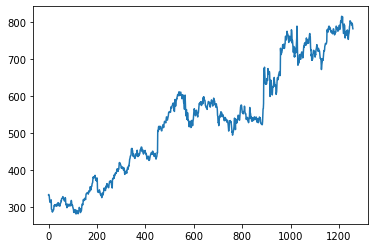

In [11]:
plt.plot(train["High"])

In [12]:
# plt.plot(train["Close"])

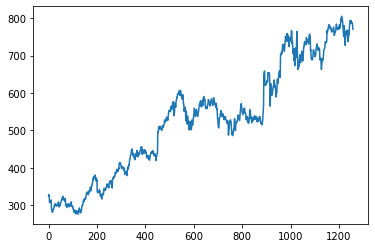

In [13]:
plt.plot(train["Low"])

In [14]:
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [15]:
train["Open"]

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [16]:
train.iloc[:,1:2].values

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [17]:
training_set=train.iloc[:,1:2].values

In [18]:
training_set.shape

(1258, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1)) # with StandardScaler() we do normalization while with MinMaxScaler we do min max transform
training_set_scaled = sc.fit_transform(training_set)

In [20]:
training_set_scaled.shape

(1258, 1)

In [21]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [22]:
training_set_scaled.shape[0]

1258

In [23]:
training_set_scaled[30-30:30,0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517])

In [24]:
training_set_scaled[31-30:31,0]

array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
       0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
       0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
       0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
       0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
       0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875])

In [25]:
gap=30
X_train=[]
y_train=[]
for i in range(gap,1236):
    X_train.append(training_set_scaled[i-gap:i,0])
    y_train.append(training_set_scaled[i,0])

    
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
X_train.shape

(1206, 30)

In [27]:
X_train.ndim

2

In [28]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.0440695 , 0.04648783,
        0.04745517],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04648783, 0.04745517,
        0.04873875],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.04745517, 0.04873875,
        0.03936305],
       ...,
       [0.93403527, 0.93483518, 0.9313937 , ..., 0.89941588, 0.91805566,
        0.9089404 ],
       [0.93483518, 0.9313937 , 0.94636878, ..., 0.91805566, 0.9089404 ,
        0.9024853 ],
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.9089404 , 0.9024853 ,
        0.89456061]])

In [29]:
print(X_train.shape)
print(y_train.shape)

(1206, 30)
(1206,)


In [30]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
X_train.shape

(1206, 30, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# from tensorflow.keras import Sequential
from keras.layers import SimpleRNN

In [33]:

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(gap, 1)))

##add 2nd  layer
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(rate = 0.2))

##add 3rd layer
model.add(LSTM(units = 50, return_sequences = True))

##add 4th  layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

# Output Layer Regression unit=1, activatiion function =:relu, linear
model.add(Dense(units = 1, activation="relu")) 

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
__________________________________________________

In [35]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [36]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1206/1206 [==============================] - 6s 5ms/step - loss: 0.0400
Epoch 2/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 3/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 4/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 5/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 6/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 7/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 8/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 9/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 10/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0039
Epoch 11/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 12/50
1206/1206 [==============================] - 4s 3ms/step - loss: 0.0037
E

In [37]:
hist.history["loss"]

[0.04000859304098026,
 0.005656013996564284,
 0.004364019200347896,
 0.004673495453166131,
 0.0038340101497337394,
 0.004134264050644651,
 0.003926457622154904,
 0.003639216189601676,
 0.003690360320938958,
 0.003907554518820635,
 0.0034944239372903386,
 0.003742468758998979,
 0.0032181352227123126,
 0.0038529123304331457,
 0.0034889421961695004,
 0.003286852458087267,
 0.0034350177275470984,
 0.002963766049837715,
 0.0031932455199503436,
 0.003562801193204982,
 0.0030994633107274696,
 0.0028166652554383574,
 0.002641327540153888,
 0.002673134436694964,
 0.002532436759527742,
 0.0026834736704427877,
 0.002726328822553998,
 0.002360355636803047,
 0.0023927958006468627,
 0.0023393243181350862,
 0.0026183920077652136,
 0.0023487382668810303,
 0.0024664420364223804,
 0.0024674276676133994,
 0.0025792915368634916,
 0.002378997151434088,
 0.0022948279837455296,
 0.002160132248309838,
 0.002253855329553657,
 0.0021703151953568803,
 0.0020502038496186584,
 0.0020899386261010646,
 0.00220338673

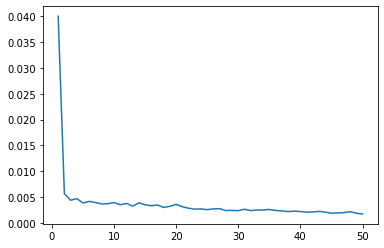

In [38]:
plt.plot(range(1,51),hist.history["loss"])

In [39]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
__________________________________________________

In [40]:
# test = pd.read_csv(r'Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values

In [41]:
total_data=pd.concat([train['Open'],test['Open']],axis=0)
inputs=total_data[len(train)-len(test)-gap:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [42]:
test.shape

(20, 6)

In [43]:
X_test=[]
for i in range(gap,92):
    X_test.append(inputs[i-gap:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

C:\Users\Nikita\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


IndexError: tuple index out of range

In [ ]:
X_test

In [ ]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

In [ ]:
#Visualization
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()